# Interactive Story and Image Generator

### Project Overview

Welcome to the Interactive Story and Image Generator, an innovative application that combines the power of open-source Large Language Models (LLMs) with advanced image generation technology to create a unique storytelling experience. This tool allows users to generate a story paragraph by paragraph, with the option to visually bring each segment to life through dynamically generated images.

### How It Works

1. **Story Generation**: Start by entering a prompt or theme based on which the LLM will generate the initial paragraph of your story. The model uses sophisticated language understanding to craft compelling and contextually relevant text.
   
2. **Paragraph Editing**: After a paragraph is generated, you have the opportunity to edit or refine the text. This feature ensures that the story develops in a direction that aligns with your creative vision.

3. **Image Generation**: Once you are satisfied with a paragraph, you can opt to generate a corresponding image. This visual representation is created using a cutting-edge diffusion model that interprets the text and translates it into a stunning graphic.

4. **Title Generation**: User can also use LLM to generate story title after it's completed.

5. **Iterative Process**: Continue the process paragraph by paragraph. You can generate, edit, and visualize each part of your story sequentially, which allows for a deeply personalized narrative experience.

### Features

- **User-Controlled Narrative**: You control the progression of the story, with tools to modify the text as needed before confirming each addition.
- **On-Demand Image Generation**: Generate images that correspond to each story segment on demand, integrating visual storytelling with written narrative.
- **Save and Export**: Save your story and images as you go, and export the complete narrative and visual compilation once you are finished.

### Getting Started

To begin, simply enter a prompt in the designated input field and press the "Generate" button. Follow the on-screen instructions to navigate through the story creation process. Whether you're a writer seeking inspiration, a teacher creating educational content, or just exploring creative storytelling, this tool provides a powerful platform for your narrative and artistic expression.


## Installation of Required Libraries

Before starting our project, we need to install several Python libraries that are essential for generating stories and corresponding images. Below is a brief overview of each library and its purpose:


In [1]:
!pip install diffusers
!pip install autoawq
!pip install -U transformers
!pip install -U bitsandbytes

#Windows may need below
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

  Using cached torch-2.3.1-cp310-cp310-win_amd64.whl.metadata (26 kB)
Using cached torch-2.3.1-cp310-cp310-win_amd64.whl (159.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0+cu121, but you have torch 2.3.1 which is incompatible.
torchvision 0.18.0 requires torch==2.3.0, but you have torch 2.3.1 which is incompatible.


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.5 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.5 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.5 MB 3.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.5 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.5 MB 3.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.5 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.5 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 6.8/9.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 4.1 MB/s eta 0:00:00
  Attempting uninst

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optimum 1.22.0.dev0 requires transformers[sentencepiece]<4.44.0,>=4.29.0, but you have transformers 4.44.0 which is incompatible.
optimum-intel 1.19.0.dev0+12438c4 requires transformers<4.44.0,>=4.36.0, but you have transformers 4.44.0 which is incompatible.


## Required Python Imports

This project utilizes several Python libraries and modules essential for our interactive story generation and image rendering. Below is a description of each import and its role in the project:

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer, pipeline, BitsAndBytesConfig,  AwqConfig

## Hugging Face Authentication Setup

This section handles the authentication required to access pre-trained models from the Hugging Face Hub. The following imports and code ensure you're logged in before proceeding.

In [2]:
# uncomment these lines to login to huggingfacehub to get access to pretrained model
from huggingface_hub import notebook_login, whoami
try:
    whoami()
    print('Authorization token already provided')
except OSError:
    notebook_login()

Authorization token already provided


## Device Selection Utility Function

### Purpose of `get_device()`
The `get_device()` function is designed to programmatically determine the most suitable computing device for loading and running our models based on available GPU memory. This function is crucial for optimizing the performance of resource-intensive tasks such as training or running large machine learning models.

### How It Works
1. **Check GPU Availability**: Initially, the function checks if CUDA is available, indicating the presence of compatible NVIDIA GPUs.
2. **Evaluate GPU Memory**: It iterates over each available GPU and retrieves the total and free memory.
   - **Memory Display**: For each GPU, it prints the total memory and the currently free memory in gigabytes for clear understanding.
3. **Memory Threshold Comparison**: The function uses a `threshold_memory` parameter (defaulting to 10GB) to determine if a GPU has enough free memory to handle the model.
   - If a GPU with sufficient free memory is found, the function returns that GPU's identifier (e.g., `cuda:0`).
4. **Fallback to CPU**: If no GPU meets the memory requirement, the function defaults to using the CPU.

### Example Usage
Below call will give the device name with 10 GB or above free memory available:
```python
device = get_device(10 * 1024 ** 3)
print("Using device:", device)


In [3]:
def get_device(threshold_memory = 10 * 1024 ** 3):
    # Check if CUDA is available
    if torch.cuda.is_available():
        # Iterate over all available GPUs
        for i in range(torch.cuda.device_count()):
            total_memory = torch.cuda.get_device_properties(i).total_memory
            free_memory = total_memory - torch.cuda.memory_reserved(i)
            # Convert from bytes to GB for easier interpretation
            total_memory_gb = total_memory / (1024 ** 3)
            free_memory_gb = free_memory / (1024 ** 3)

            # Print available memory for each GPU
            print(f"GPU {i}: Total Memory: {total_memory_gb:.2f} GB, Free Memory: {free_memory_gb:.2f} GB")

        # Check each GPU to find the first one that meets the memory requirement
        for i in range(torch.cuda.device_count()):
            free_memory = total_memory - torch.cuda.memory_reserved(i)
            if free_memory > threshold_memory:
                return f"cuda:{i}"  # Return the first GPU with enough free memory

    # Default to CPU if no suitable GPU is found
    return "cpu"
# Get the best device
device = get_device(1 * 1024 ** 3)
print("Using device:", device)

GPU 0: Total Memory: 12.00 GB, Free Memory: 12.00 GB
Using device: cuda:0


## Model Loading and Resource Management

In the upcoming sections of this notebook, we will be loading and utilizing two sophisticated AI models to generate stories and corresponding images. These models will be used to demonstrate how advanced language processing and image generation technologies can be seamlessly integrated to produce rich multimedia content.

### Model Setup

* **LLaMA3 in 4bit Quantized Mode**: We will load the LLaMA3 model in AWG quantized mode to optimize performance and efficiency. This configuration enhances the speed and reduces the memory footprint, which is critical for handling large language processing tasks.

* **Stable Diffuser Model**: We can either deploy the `stabilityai/stable-diffusion-3-medium-diffusers` model or less GPU RAM demanding `runwayml/stable-diffusion-v1-5`.



### Hardware Utilization Strategy (Kaggle Only)

To ensure efficient utilization of our resources and achieve optimal performance, the workload will be distributed across two NVIDIA T4 GPUs:
- **First T4 GPU**: Dedicated to running the LLaMA3 model for story text generation and generating prompts for the image diffuser.
- **Second T4 GPU**: Assigned exclusively for the image generation tasks handled by the Stable Diffusion model.

### Managing GPU Resources Based on Availability

Depending on the available GPU memory, we explore two different approaches to image generation:

1. **For High GPU Resources (e.g., 24 GB Max RAM)**: If ample resources are available, such as on platforms like Kaggle with two T4 GPUs each offering 16 GB, the latest `stabilityai/stable-diffusion-3-medium-diffusers` model is employed. This model requires about 10 GB and is ideal for generating detailed and realistic images.

2. **For Limited GPU Resources (e.g., 12 GB Max RAM)**: In scenarios with restricted GPU memory, the older `runwayml/stable-diffusion-v1-5` model, which requires around 4 GB, is more suitable. Combined with LLaMA3 in 4-bit quantization (consuming about 5 GB), this setup fits well within a 12 GB limit.

### Adaptations for Conservative GPU RAM Scenarios

In cases where GPU resources are even more constrained, it may be necessary to offload one of the models to the CPU. Using Intel's OpenVINO, we can efficiently run LLMs on the CPU or integrated GPU (iGPU), thus freeing up GPU resources for other tasks.

This structured approach allows us to leverage the strengths of each model without resource contention, ensuring smooth and efficient operations throughout our creative and generative processes.


## Setting Up LLaMA 3 in 4-Bit Quantization Mode

This section details the configuration of the LLaMA 3 model to operate in 4-bit quantization mode. This mode is selected to enhance computational efficiency while maintaining model performance.

### Device Configuration

- **Primary Device**: The model will initially be set to run on `cuda:0`, leveraging the first GPU available. This setting ensures optimal performance but can be adjusted based on the resources available to you.

### Optional Configuration

- **Text Streamer**: For those interested in observing the model's operation more closely, there is an option to create a text streamer. This tool will allow you to view the tokens as they are generated by the model, providing insight into the model's processing in real-time.


In [4]:
# Replace model name as per choice
#model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
model_id = "hugging-quants/Meta-Llama-3.1-8B-Instruct-AWQ-INT4"

tokenizer = AutoTokenizer.from_pretrained(model_id)

quantization_config = AwqConfig(
    bits=4,
    fuse_max_seq_len=512, # Note: Update this as per your use-case
    do_fuse=True,
)
story_model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        low_cpu_mem_usage=True,
        device_map='cuda:0',  # Load on GPU
        quantization_config=quantization_config
        )

streamer = TextStreamer(
     tokenizer,
     skip_prompt=False,
     skip_special_tokens=False
)

text_pipeline = pipeline(
    "text-generation",
    model=story_model,
    tokenizer=tokenizer,
    max_new_tokens=4000, # Max number of tokens to generate
    #streamer=streamer,  # uncomment to view tokens as they being generated
)

D:\Projects\env3.10\lib\site-packages\transformers\quantizers\auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.However, loading attributes (e.g. ['version', 'fuse_max_seq_len', 'exllama_config', 'modules_to_fuse', 'do_fuse']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  warnings.warn(warning_msg)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## Testing LLM Text Generation Setup

To ensure our Large Language Model is configured correctly for generating text, we will run a quick test. This involves using a predefined prompt to generate a short story, ensuring that the model processes and responds appropriately.


In [5]:
prompt = [
  {"role": "system", "content": "You are a skillful storyteller that specializes in writing stories for adults"},
  {"role": "user", "content": "Write a short story of 4 paragraphs"},
]

inputs = tokenizer.apply_chat_template(
  prompt,
  tokenize=False,
  add_generation_prompt=True,
  return_tensors="pt",

)
output=text_pipeline(inputs)
print(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are a skillful storyteller that specializes in writing stories for adults<|eot_id|><|start_header_id|>user<|end_header_id|>

Write a short story of 4 paragraphs<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The old mansion stood at the top of the hill, its grandeur and beauty shrouded in mystery. It was a place where time seemed to stand still, where the past and present collided in a swirl of secrets and lies.

As I stepped inside the mansion, I couldn't shake off the feeling that I was being watched. The air inside was thick with the scent of old books and dust. I wandered through the rooms, my footsteps echoing off the walls.

As I reached the top floor, I stumbled upon a door that seemed out of place. It was an old wooden door, adorned with intricate carvings. I pushed the door open, and a warm light spilled out, bathing me in its radiance.


## Loading Stable Diffusion Model

This following cell sets up the necessary components for generating images using stable diffusion:

### Diffusion Model Options

1. **Latest Model: `stabilityai/stable-diffusion-3-medium-diffusers`**
   - **Requirements**: This more advanced model requires a larger GPU memory footprint, approximately 10 GB, to operate efficiently. It is capable of producing more detailed and realistic images.
   - **Ideal Use Case**: If ample GPU resources are available, such as 24 GB of RAM, this model is the preferred choice. For instance, on platforms like Kaggle, where two T4 GPUs each with 16 GB are available, this setup is optimal. One GPU can be dedicated to running a text generation LLM such as LLaMA3, while the other handles the image generation tasks with the medium diffusion model.

2. **Older Model: `runwayml/stable-diffusion-v1-5`**
   - **Requirements**: This model is smaller and requires around 4 GB of GPU RAM, making it suitable for systems with limited resources.
   - **Adaptation for Limited Resources**: In environments with around 12 GB of GPU RAM, this older stable diffusion model is more appropriate. It allows for effective resource management, where a text generator like LLaMA3 in 4-bit quantization, which consumes about 5 GB, and the stable diffusion v1.5 model, requiring another 4 GB, can fit within this memory constraint.

## Option 1: Loading the v3 Medium Stable Diffusion Model

In the next cell, we will initialize the v3 medium Stable Diffusion model, renowned for its ability to generate highly realistic images. While this model offers superior image quality, it is also notable for its substantial GPU RAM consumption.  If there are GPU RAM constraints then you may skip this cell and move to older stable diffuser mode given in later cell.

### Optimizing Resource Usage

To manage resource demands effectively, we consider several optimization strategies:

- **4-Bit Quantization of T5 Model**: Implementing 4-bit quantization for the accompanying text model (T5) significantly reduces its memory footprint without drastically impacting performance. This approach balances resource efficiency with quality output.

- **Eliminating the Text Encoder**: For more substantial memory savings, one radical option is to remove the text encoder model entirely. While this reduction will decrease the overall output quality, it significantly lessens RAM requirements, making it a viable option for environments with strict resource limitations.

These adjustments allow us to tailor the model setup to better fit the available hardware, ensuring efficient operations while still striving for high-quality results.


In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline
from transformers import T5EncoderModel, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_4bit=True)
model_id = "stabilityai/stable-diffusion-3-medium-diffusers"

text_encoder = T5EncoderModel.from_pretrained(
    model_id,
    subfolder="text_encoder_3",
    device_map="balanced", # Can change to cuda:x
    quantization_config=quantization_config,
)

diffuser_pipe = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    text_encoder_3= text_encoder,
    device_map="balanced", # Can change to cuda:x
    torch_dtype=torch.float16,
)

## Option 2: Loading the v1 Stable Diffusion Model
Loading v1 Stable Diffuser model is straight forward

In [7]:
import torch
from diffusers import StableDiffusionPipeline
model_id = "runwayml/stable-diffusion-v1-5"
diffuser_pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
diffuser_pipe = diffuser_pipe.to("cuda")

D:\Projects\env3.10\lib\site-packages\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

D:\Projects\env3.10\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Testing Image Generation via Diffuser
To verify that our Diffuser pipeline is properly set up for image generation, we'll conduct a brief test. This test involves using a specified prompt to produce an image, confirming that the model processes and responds correctly.

D:\Projects\env3.10\lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/30 [00:00<?, ?it/s]

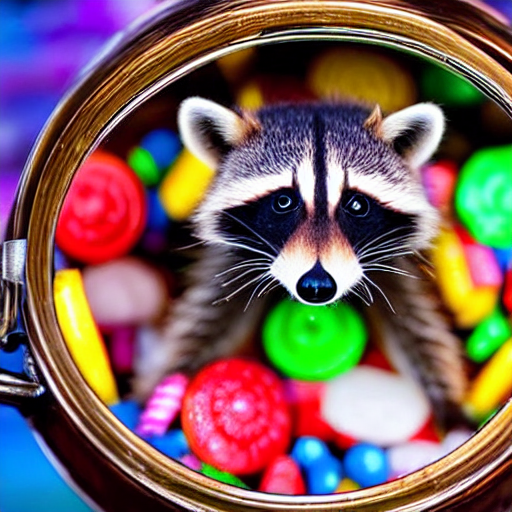

In [8]:
image = diffuser_pipe(
        #prompt="a photo of a cat holding a sign that says hello world",
        prompt="A raccoon trapped inside a glass jar full of colorful candies, the background is steamy with vivid colors",
        negative_prompt="",
        num_inference_steps=30,
        height=512,
        width=512,
        guidance_scale=7.0,
    ).images[0]
image

## Helper Functions for Story and Image Generation

In this section, we introduce a series of helper functions designed to streamline the process of generating text and images, ensuring that outputs are clean and relevant to the given prompts.

### Key Functions Defined

- **`text_without_prompt()`**: This function strips the generated text of any initial prompts and special tokens, returning only the clean, narrative text. It ensures that the output is ready for display or further processing without requiring additional formatting.

- **`get_diffuser_prompt()`**: Generates a concise description for a diffuser model based on a provided story paragraph. This description acts as a prompt for generating images that visually represent the text.

- **`generate_img()`**: Requests the diffusion model to create an image based on a specified prompt. It allows for detailed control over the image generation process, including step count and image dimensions.

- **`generate_next_paragraph()`**: Facilitates the generation of a subsequent paragraph in a story, ensuring the narrative flows logically from one section to the next. This function is particularly useful for building coherent and engaging storylines.

Each function is tailored to handle specific aspects of the story and image generation workflow, from refining text outputs to crafting visual prompts and constructing seamless narratives.


In [9]:
# Returns the output only without the prompt and special tokens
def text_without_prompt(tokenizer, input_text, generated_text):
    generated_text_without_prompt = generated_text[len(input_text):]
    cleaned_text = tokenizer.decode(
        tokenizer.encode(generated_text_without_prompt, add_special_tokens=False),
        skip_special_tokens=True
    )
    return cleaned_text

# Generate prompt using llm (e.g story writer) for diffuser
def get_diffuser_prompt(para):
    prompt = [
      {"role": "system", "content": ""},
      {"role": "user", "content": f"Example of a picture description: A cat sleeps peacefully under a warm sunbeam. Now Given the following paragraph from a story, generate a single concise description line suitable for a picture that captures the scene described. Do not give any explanatory text: {para}"},
    ]
    
    inputs = tokenizer.apply_chat_template(
      prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )
    output=text_pipeline(inputs)
    text = text_without_prompt(tokenizer, inputs, output[0]['generated_text'])
    return text

def get_story_title(para):
    prompt = [
      {"role": "system", "content": "You are a creative writer skilled in summarizing complex narratives into engaging titles."},
      {"role": "user", "content": f"Based on the following story description, generate a captivating and relevant title without any explanatory text.  Give me just the title only: {para}"},
    ]
    
    inputs = tokenizer.apply_chat_template(
      prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )
    output=text_pipeline(inputs)
    text = text_without_prompt(tokenizer, inputs, output[0]['generated_text'])
    return text
    
# Requests diffuser to generate image
def generate_img(prompt, steps):
    image = diffuser_pipe(
        prompt=prompt,
        negative_prompt="",
        num_inference_steps=steps,
        height=512,
        width=512,
        guidance_scale=7.0,
    ).images[0]

    return image

# Generate next paragraph for a given partial story
def generate_next_paragraph(genre, prompt, temperature, max_length):
    structured_prompt = [
          {"role": "system", "content": f"You are a creative story writer for Genre: {genre}."},
          {"role": "user", "content": f"Based on the following text, generate a single coherent"
                                      f"paragraph that continues the narrative. If there is no starting"
                                      f"text then please start a creative story with an engaging opening"
                                      f"paragraph that sets the scene. No extra explanatory text please and"
                                      f"just the story's next paragraph only.  The overall size of final story should not be more than 4 paragraphs so conclude it with closing thoughts when about to reach 4 paragraphs"},
          {"role": "assistant", "content": f"{prompt}"},
        ]
    inputs = tokenizer.apply_chat_template(
      structured_prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )

    # Generate text with varying temperatures
    output = text_pipeline(inputs, max_length=max_length, num_return_sequences=1, temperature=temperature)
    generated_text = output[0]['generated_text']
    cleaned_text = text_without_prompt(tokenizer, inputs, generated_text)
    return cleaned_text
   


In [10]:
input_text = """Once upon a time, In a land where the sun dipped into the horizon and painted the sky with hues of crimson and gold, the village of Brindlemark lay nestled in a valley. The villagers, a hardy and resourceful folk, lived simple lives, tending to their animals, harvesting their crops, and weaving their wool. But amidst the tranquility of Brindlemark, a sense of unease began to stir, like a gentle breeze that whispers secrets to the trees.
As the villagers of Brindlemark went about their daily routines, a lone figure emerged from the shadows of the nearby forest. He was a tall, dark-haired stranger, with eyes that seemed to bore into the souls of those around him. The villagers of Brindlemark couldn't help but feel a shiver run down their spines as the stranger approached, his presence seeming to draw the very air out of the atmosphere.
The villagers of Brindlemark stood frozen in place, their eyes fixed on the stranger as he drew closer."""

get_diffuser_prompt(input_text)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


'A lone figure emerges from the shadows of the nearby forest, a tall, dark-haired stranger with eyes that seem to bore into the souls of those around him.'

## GUI for Story and Image Generation

This section of the notebook provides an interactive graphical user interface (GUI) to facilitate the generation and editing of story text and corresponding images. Here's how you can utilize the GUI effectively:

### Workflow Overview

1. **Select Genre**: Begin by choosing a genre from the dropdown menu. This choice sets the thematic tone for the story generation.

2. **Adjust Temperature**: Use the slider to set the 'temperature' of the text generation. A higher temperature generally results in more creative and varied text outputs.

3. **Generate Text**: Click the "Generate Text" button to produce the initial text based on the selected genre and temperature. The generated text will appear in a text area where it can be reviewed and edited.  User can also provide a sample text to start with. 

4. **Optional Image Generation**:
    - If you wish to create an image that represents the text, click on "Generate Image Prompt" after editing the text to your satisfaction.
    - Modify the generated prompt as needed in the text area provided.
    - Click "Generate Image" to start the image generation process. You can adjust the number of iterations for image refinement.
    - The generated image can be accepted or regenerated multiple times until the desired outcome is achieved.

5. **Acceptance of Text and Image**:
    - Once you are satisfied with the text and image, click "Accept Edited Text" and "Accept Image" to include them in the final story compilation.

6. **Story Title Generation**:
    - Once story is completed, you may proceed with generating story title using 'Generate Story Title' Button. Modify the title if needed and click on Accept Title botton to add it to our Story as Title.
   
7. **Final Compilation and Saving**:
    - The accepted text and images are compiled in a designated area of the notebook.
    - Once your story is complete, use the "Save" button to save the entire story along with embedded images in HTML format. Images are stored in base64 format within the HTML to ensure they are integral to the document.

### Additional Features

- The GUI also allows for the dynamic display of the generated image and ongoing updates on the status of operations (e.g., text generation, image processing).
- Throughout the process, users have the flexibility to edit text and regenerate images as needed to fine-tune the narrative and visual representations.


In [33]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import base64
from PIL import Image
from io import BytesIO

# Initial text for the story
initial_story_text = "Once upon a time,"

title_label = widgets.Label(value="Interactive Story Writer")       
title_label.style.font_weight = 'bold'
title_label.style.font_size = '32px'
title_label.style.font_family = 'Arial'

# Dropdown for selecting the genre
genre_selector = widgets.Dropdown(
    options=['Fantasy', 'Sci-Fi', 'Mystery', 'Romance', 'Adventure'],
    value='Fantasy',
    description='Genre:',
    disabled=False,
)

# Slider for adjusting the temperature
temperature_slider = widgets.FloatSlider(
    value=0.8,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Temperature:',
    readout_format='.1f',
    style={'description_width': 'initial'}
)

# Text area for editing generated text
text_editor = widgets.Textarea(
    value=initial_story_text,
    placeholder=initial_story_text,
    description='Edit Text:',
    layout={'width': '100%', 'height': '100px'}
)

# Button to generate story continuations
generate_text_button = widgets.Button(description="Generate Paragraph")
generate_title_button = widgets.Button(description="Generate Story Title")
text_generation_output = widgets.Label()
generate_text_container = widgets.HBox([generate_text_button, generate_title_button, text_generation_output])

# Button to generate image
generate_image_prompt_button = widgets.Button(description="Generate Image Prompt", layout=widgets.Layout(width='200px'))
image_prompt_output = widgets.Label()
generate_image_prompt_container = widgets.HBox([generate_image_prompt_button, image_prompt_output])

edit_image_prompt_area = widgets.Textarea(
    value='',
    placeholder='Image generation prompt',
    description='Edit Image Prompt:',
    layout={'width': '100%', 'height': '100px'}
)

# Button to generate image
generate_image_button = widgets.Button(description="Generate Image")
# Text area for editing generated text
generate_image_button_iteration_text = widgets.Textarea(
    value='30',
    placeholder='',
    description='Iterations:',
    layout={'width': '10%', 'height': '30px'}
)

image_generation_output = widgets.Label()
generate_image_container = widgets.HBox([generate_image_button, generate_image_button_iteration_text, image_generation_output])


accept_text_button = widgets.Button(description="Accept Edited Text")
accept_image_button = widgets.Button(description="Accept Image")
accept_story_title = widgets.Button(description="Accept Story Title")
accept_buttons_container = widgets.HBox([accept_text_button, accept_image_button, accept_story_title])

save_story_button = widgets.Button(description="Save")
save_story_output = widgets.Label()
reset_story_button = widgets.Button(description="Reset")
save_button_container = widgets.HBox([save_story_button, save_story_output, reset_story_button])

# HTML widget to display the generated image
image_display = widgets.HTML(
    value='Generated image will appear here',
    layout={'width': '100%', 'height': '300px'}
)

# Accumulated story text using HTML for richer formatting
story_display = widgets.HTML(
    value='',
    placeholder='Your story will appear here...',
    description='',
    layout=widgets.Layout(
        width='100%',
        height='1500px',
        overflow_y='auto',
        border='2px solid black',  # CSS for border: [width style color]
        box_shadow='2px 2px 2px grey',  # Optional: adds shadow for a 3D effect
        padding='10px'  # Optional: adds space between the border and content
    )
)

accumulated_story_txt = ''

def on_generate_clicked():
    global accumulated_story_txt
    # Get the prompt and genre from user inputs
    prompt = f"{genre_selector.value}: {story_display.value}"
    temperature = temperature_slider.value
    display(f"Accumulated story: {accumulated_story_txt}")
    text_generation_output.value = "Generating Text ..."
    # Generate next paragraph
    generated_text = generate_next_paragraph(genre_selector.value, accumulated_story_txt + text_editor.value, temperature, max_length=2000)
    text_generation_output.value = "Text Generation Completed!"
    text_editor.value = text_editor.value + generated_text

def on_generate_story_title():
    global accumulated_story_txt
    text_generation_output.value = "Generating Story Title ..."
    generated_title = get_story_title(accumulated_story_txt)
    text_editor.value = generated_title
    text_generation_output.value = "Story Title Generation Completed!"
    

def on_generate_image_prompt():
    image_prompt_output.value="Getting Diffuser prompt ..."
    diffuser_prompt=get_diffuser_prompt(text_editor.value)
    image_prompt_output.value = "Image Prompt Generation Completed!"
    edit_image_prompt_area.value = diffuser_prompt

def on_generate_image():
    image_generation_output.value="Generating Image ..."
    img=generate_img(edit_image_prompt_area.value, int(generate_image_button_iteration_text.value))
    image_generation_output.value = "Image Generation Completed!"
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    image_display.value = f'<img src="data:image/png;base64,{img_str}" alt="Generated Image"/>'

def on_accept_text():
    global accumulated_story_txt
    # Append the edited text to the HTML widget
    new_text = f"<p>{text_editor.value}</p>"
    accumulated_story_txt += text_editor.value
    story_display.value += new_text
    text_editor.value = ''

def on_accept_image():
    
    # Append the displayed image to the accumulated story
    story_display.value += f'<div>{image_display.value}</div>'
    image_display.value = ''
    edit_image_prompt_area.value = ''

def on_accept_story_title():
    new_text = f"<h1>{text_editor.value}</h1>"
    story_display.value = new_text + story_display.value
    
def on_save_clicked():
    html_content = story_display.value  # Get the HTML content from the widget
    with open('story.html', 'w') as file:
        file.write(html_content)  # Write the HTML content to a file
    save_story_output.value="Saved as story.html"

def on_reset_clicked():
    edit_image_prompt_area.value = ''
    image_display.value = ''
    story_display.value = ''
    text_editor.value = ''
    accumulated_story_txt = ''
    
generate_title_button.on_click(lambda b: on_generate_story_title())
accept_text_button.on_click(lambda b: on_accept_text())
generate_image_prompt_button.on_click(lambda b: on_generate_image_prompt())
generate_image_button.on_click(lambda b: on_generate_image())
accept_image_button.on_click(lambda b: on_accept_image())
accept_story_title.on_click(lambda b: on_accept_story_title())
generate_text_button.on_click(lambda b: on_generate_clicked())
save_story_button.on_click(lambda b: on_save_clicked())
reset_story_button.on_click(lambda b: on_reset_clicked())

# Display widgets
display(title_label, genre_selector, temperature_slider, generate_text_container,
        text_editor, generate_image_prompt_container, edit_image_prompt_area, 
        generate_image_container, image_display, accept_buttons_container, 
        story_display, save_button_container)

Label(value='Interactive Story Writer', style=LabelStyle(font_family='Arial', font_size='32px', font_weight='b…

Dropdown(description='Genre:', options=('Fantasy', 'Sci-Fi', 'Mystery', 'Romance', 'Adventure'), value='Fantas…

FloatSlider(value=0.8, description='Temperature:', max=1.0, min=0.1, readout_format='.1f', style=SliderStyle(d…

Textarea(value='Once upon a time,', description='Edit Text:', layout=Layout(height='100px', width='100%'), pla…

Textarea(value='', description='Edit Image Prompt:', layout=Layout(height='100px', width='100%'), placeholder=…

HTML(value='Generated image will appear here', layout=Layout(height='300px', width='100%'))

HTML(value='', layout=Layout(border_bottom='2px solid black', border_left='2px solid black', border_right='2px…

  0%|          | 0/30 [00:00<?, ?it/s]

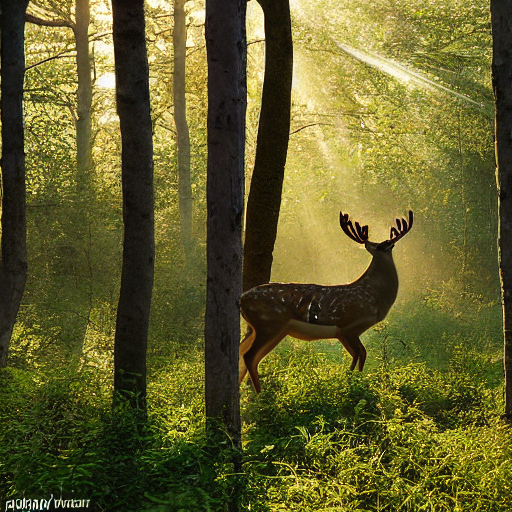

In [15]:
generate_img("Dappled forest light filters through the canopy, casting a soft glow on the dew-covered undergrowth, as a lone deer tiptoes through the clearing.", steps=30)

### Cleanup code to free GPU memory
Use this cell to free up allocated GPU memory.  May need to add new variables to it

In [4]:
# TIP: use %whos magic command to see what variables are loaded in jupyter kernel

variables_to_delete = ['text_pipeline', 'story_model', 'streamer', 'tokenizer', 'text_encoder', 'diffuser_pipe', 'image']

for var in variables_to_delete:
    try:
        del globals()[var]
    except KeyError:
        print(f"Variable {var} was not defined.")

import gc
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=torch.device('cuda')))
import gc
gc.collect()

Variable text_encoder was not defined.
Variable image was not defined.
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |   8226 MiB |   9152 MiB |   9152 MiB |
|       from large pool |      0 B   |   7940 MiB |   8836 MiB |   8836 MiB |
|       from small pool |      0 B   |    285 MiB |    315 MiB |    315 MiB |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |   8226 MiB |   9152 MiB |   9152

127

## Using OpenVINO for CPU and iGPU
This is an incomplete work and merely a demonstration on how to use OpenVINO to load and run LLM and stable diffusion

### LLM

In [ ]:
import openvino_genai as ov_genai
import huggingface_hub as hf_hub
model_id = "OpenVINO/mistral-7b-instruct-v0.1-int4-ov"
model_path = "mistral-7b-instruct-v0.1-int4-ov"
# download 
hf_hub.snapshot_download(model_id, local_dir=model_path)

device = "GPU"
pipe = ov_genai.LLMPipeline(model_path, device)
print(pipe.generate("What is OpenVINO?", max_length=200))

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

### Stable Diffusion

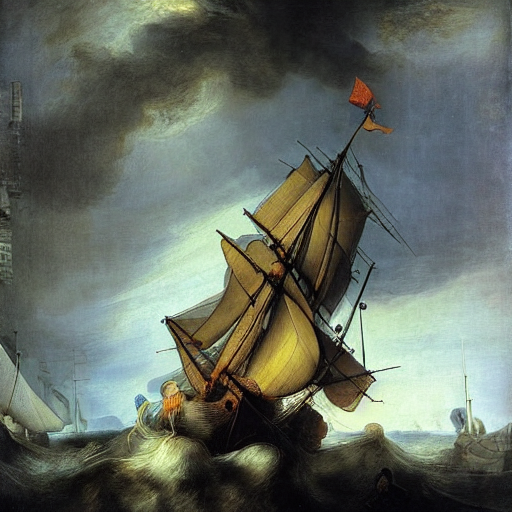

In [5]:
from optimum.intel.openvino import OVStableDiffusionPipeline

model_id = "OpenVINO/stable-diffusion-v1-5-int8-ov"
pipeline = OVStableDiffusionPipeline.from_pretrained(model_id, "GPU")

prompt = "sailing ship in storm by Rembrandt"
images = pipeline(prompt).images

In [12]:
accumulated_story_txt

"Once upon a time,in a world where magic was a mere whisper, a young apprentice named Eira stood at the threshold of the ancient forest. The air was heavy with the scent of damp earth and decaying leaves, and Eira felt the hairs on the back of her neck stand on end as she stepped into the unknown.As she ventured deeper into the forest, Eira noticed that the trees seemed to be growing taller and closer together, casting deep shadows that made it difficult to see. The air grew colder, and Eira could see her breath misting in the air as she walked. Suddenly, a faint rustling sound came from the underbrush, and Eira's heart skipped a beat as she wondered what was making the noise.The rustling sound grew louder, and Eira could see the leaves and twigs of the underbrush begin to stir. Suddenly, a pair of piercing green eyes emerged from the underbrush, and Eira felt a shiver run down her spine as she gazed into the eyes of the creature that was watching her.The creature's eyes seemed to bore

In [24]:
def get_story_title(para):
    prompt = [
      {"role": "system", "content": "You are a creative writer skilled in summarizing complex narratives into engaging titles."},
      {"role": "user", "content": f"Based on the following story description, generate a captivating and relevant title without any explanatory text.  Give me just the title only: {para}"},
    ]
    
    inputs = tokenizer.apply_chat_template(
      prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )
    output=text_pipeline(inputs)
    text = text_without_prompt(tokenizer, inputs, output[0]['generated_text'])
    return text

title_text=get_story_title(accumulated_story_txt)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [19]:
# Accumulated story text using HTML for richer formatting
story_display1 = widgets.HTML(
    value='',
    placeholder='Your story will appear here...',
    description='',
    layout=widgets.Layout(
        width='100%',
        height='1500px',
        overflow_y='auto',
        border='2px solid black',  # CSS for border: [width style color]
        box_shadow='2px 2px 2px grey',  # Optional: adds shadow for a 3D effect
        padding='10px'  # Optional: adds space between the border and content
    )
)


In [30]:
story_display1.value=f"<h1>{title_text}</h1>" + story_display1.value

In [29]:
story_display1.value="story here"

In [20]:
display(story_display1)

HTML(value='', layout=Layout(border_bottom='2px solid black', border_left='2px solid black', border_right='2px…